# ch5. 데이터 전처리 part2
이전 챕터에서는 카테고리형 변수 컬럼들의 인코딩을 적용해보았습니다. 그리고 dummy 컬럼을 활용하여 one-hot encoding을 적용하였습니다. 이번 챕터에서는 Age, Fare 처럼 연속형 확률 변수 컬럼들의 전처리 과정을 배워보겠습니다.

In [21]:
import pandas as pd

df = pd.read_csv("./data/tmp.csv")

In [22]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,22.000000,1,0,7.2500,1,0,1,0,0,1
1,2,1.0,1,38.000000,1,0,71.2833,1,0,0,1,0,0
2,3,1.0,3,26.000000,0,0,7.9250,0,1,0,0,0,1
3,4,1.0,1,35.000000,1,0,53.1000,1,0,0,0,0,1
4,5,0.0,3,35.000000,0,0,8.0500,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,25.962264,0,0,8.0500,0,1,1,0,0,1
1305,1306,NaN,1,39.000000,0,0,108.9000,0,1,0,1,0,0
1306,1307,NaN,3,38.500000,0,0,7.2500,0,1,1,0,0,1
1307,1308,NaN,3,25.962264,0,0,8.0500,0,1,1,0,0,1


## 연속형 확률 변수 전처리
### 분포 확인
df.plot 함수를 활용하여 연속형 확률 변수들을 각각 plot 해보겠습니다.

<Axes: ylabel='Frequency'>

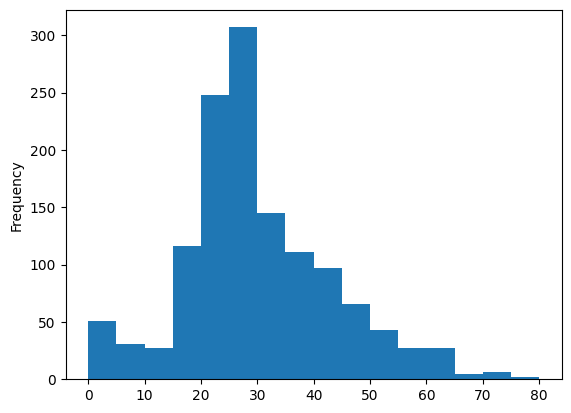

In [7]:
import numpy as np

df["Age"].plot(kind="hist", bins=np.arange(0, 85, 5))

<Axes: ylabel='Frequency'>

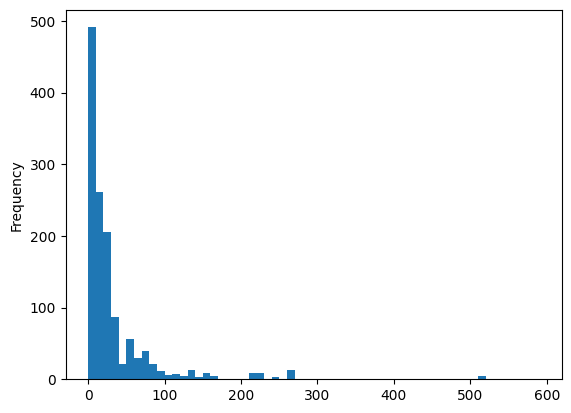

In [8]:
df["Fare"].plot(kind="hist", bins=np.arange(0, 600, 10))

### log scale
Fare의 경우엔 아래쪽으로 쏠려있고, 큰 값들이 보입니다. 이런 경우, log를 취해주면 우리가 좋아하는 종모양 분포에 가까워집니다. 0 값이 포함되어 있기 때문에 1을 더해주고 로그를 취해주는 np.log1p를 사용해보겠습니다.

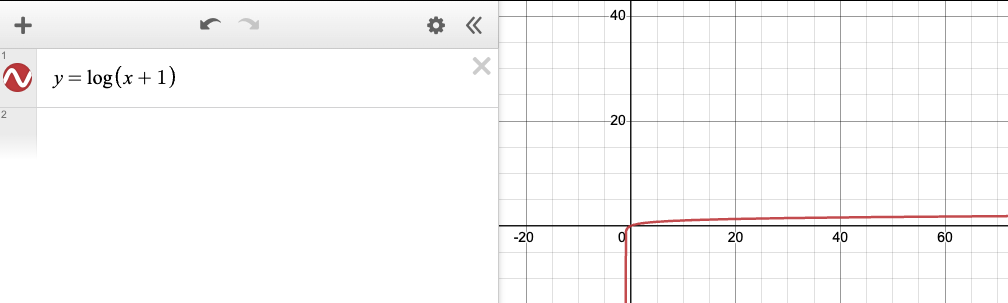

In [25]:
df["Fare"] = np.log1p(df["Fare"])

<Axes: ylabel='Frequency'>

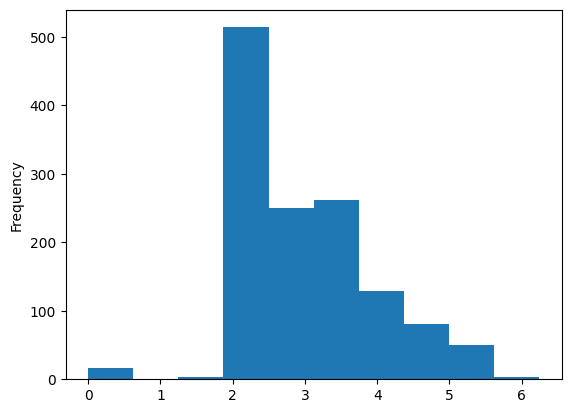

In [26]:
df["Fare"].plot(kind="hist")

log를 취해준 결과, 왼쪽으로 쏠림 현상이 완화되었고 값들의 범위가 좁혀졌습니다. log scale은 정말 많이 사용되는 기법이니, 꼭 기억해주세요.

### Standard Scaling & MinMax Scaling & RobustScaler
연속형 확률 변수의 크기를 조정해주면 예측 모델이 훨씬 안정적으로 학습되며, 크게 세 종류가 있습니다.

- min-max scaling: 최소값을 0, 최대값을 1로 고정하고 그 비율을 나머지 값들에 적용. 만약 최대나 최소값이 극단적일 경우 부적합. ex) 0세 = 0, 80세=1, 20세=0.25. 
- standard scaling: 각 값에서 평균값을 빼주고 표준편차로 나눠줌.
- robust scaling: boxplot에서 배웠던 기준에서 outlier에 해당하는 값들을 제외하고 standard scale 해줌. 

먼저 적합한 scaler를 선택하기 위해서 Age와 Fare를 각각 boxplot 그려보겠습니다.

<Axes: >

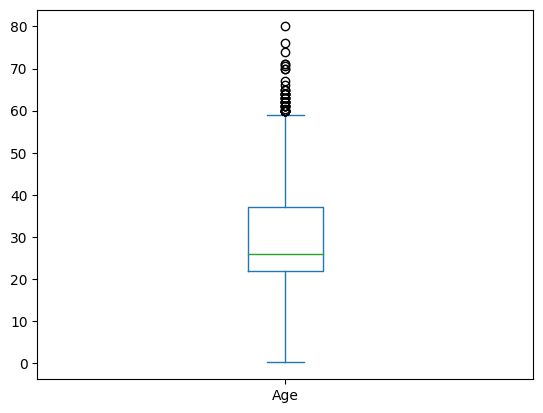

In [28]:
df["Age"].plot(kind="box")

<Axes: >

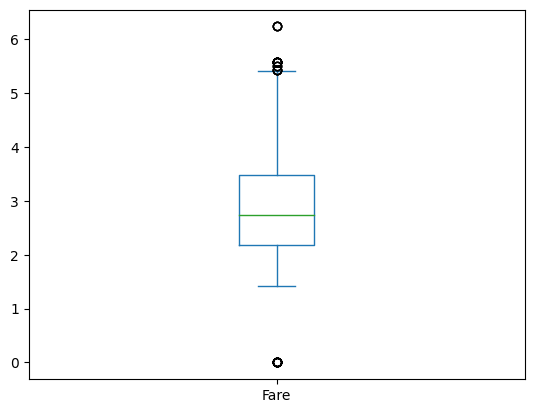

In [13]:
df["Fare"].plot(kind="box")

Age와 Fare에는  경우엔 Standard Scaler, 나머지 컬럼들에는 MinMax Scaler를 적용해보겠습니다.  
scaling에는 정답이 정해져있는 것이 아니고, 데이터의 성격에 따라서 적절하게 선택하면 됩니다.

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [31]:
df[["Age", "Fare"]] = standard_scaler.fit_transform(df[["Age", "Fare"]])

<Axes: >

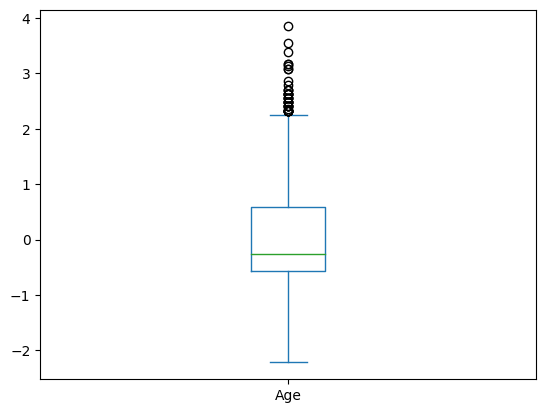

In [18]:
df["Age"].plot(kind="box")

<Axes: >

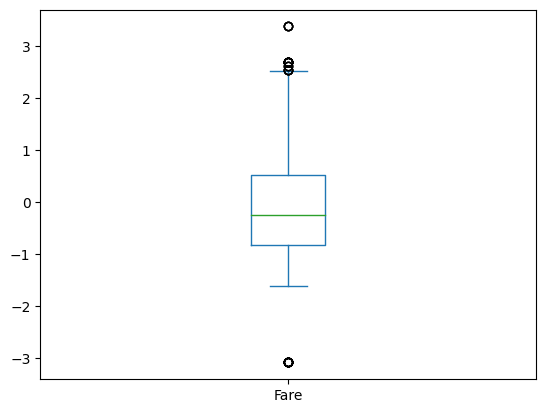

In [19]:
df["Fare"].plot(kind="box")

In [29]:
df[["SibSp", "Parch", "FamilySize"]] = minmax_scaler.fit_transform(df[["SibSp", "Parch", "FamilySize"]])

In [32]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,-0.560331,0.125,0.000000,-0.898323,0.1,0,1,0,0,1
1,2,1.0,1,0.655107,0.125,0.000000,1.343689,0.1,0,0,1,0,0
2,3,1.0,3,-0.256471,0.000,0.000000,-0.817085,0.0,1,0,0,0,1
3,4,1.0,1,0.427212,0.125,0.000000,1.044367,0.1,0,0,0,0,1
4,5,0.0,3,0.427212,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
1305,1306,NaN,1,0.731072,0.000,0.000000,1.776495,0.0,1,0,1,0,0
1306,1307,NaN,3,0.693089,0.000,0.000000,-0.898323,0.0,1,1,0,0,1
1307,1308,NaN,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1


## Train, Test 분리 및 저장

이렇게 전처리를 모두 마쳤습니다. 이제 다시 train, test 셋을 분리한 뒤, 각각을 csv 파일로 저장해보겠습니다.

In [33]:
train_df = df[:891]
test_df = df[891:]

In [36]:
train_df["Survived"] = train_df["Survived"].astype(int)

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_96352/1318520054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Survived"] = train_df["Survived"].astype(int)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.560331,0.125,0.000000,-0.898323,0.1,0,1,0,0,1
1,2,1,1,0.655107,0.125,0.000000,1.343689,0.1,0,0,1,0,0
2,3,1,3,-0.256471,0.000,0.000000,-0.817085,0.0,1,0,0,0,1
3,4,1,1,0.427212,0.125,0.000000,1.044367,0.1,0,0,0,0,1
4,5,0,3,0.427212,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.180507,0.000,0.000000,-0.352025,0.0,1,1,0,0,1
887,888,1,1,-0.788225,0.000,0.000000,0.469141,0.0,1,0,0,0,1
888,889,0,3,-0.546252,0.125,0.222222,0.223950,0.3,0,0,0,0,1
889,890,1,1,-0.256471,0.000,0.000000,0.469141,0.0,1,1,1,0,0


In [40]:
train_df.to_csv("./data/preprocessed_train.csv", encoding="utf-8", index=False)

In [41]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
891,892,3,0.389230,0.000,0.000000,-0.828233,0.0,1,1,0,1,0
892,893,3,1.338790,0.125,0.000000,-0.930111,0.1,0,0,0,0,1
893,894,2,2.478263,0.000,0.000000,-0.630918,0.0,1,1,0,1,0
894,895,3,-0.180507,0.000,0.000000,-0.735068,0.0,1,1,0,0,1
895,896,3,-0.560331,0.125,0.111111,-0.405983,0.2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
1305,1306,1,0.731072,0.000,0.000000,1.776495,0.0,1,0,1,0,0
1306,1307,3,0.693089,0.000,0.000000,-0.898323,0.0,1,1,0,0,1
1307,1308,3,-0.259338,0.000,0.000000,-0.802717,0.0,1,1,0,0,1


In [39]:
test_df = test_df.drop(["Survived"], axis=1)

In [42]:
test_df.to_csv("./data/preprocessed_test.csv", encoding="utf-8", index=False)

## 정리
지금까지 연속형 확률변수의 전처리를 진행해보았습니다. 먼저 분포를 시각화하고, 지나치게 쏠림 현상이 있으면 log scale을 적용해주었습니다. 그 다음 standard scaler와 minmax scaler를 적용하여 값들의 범위를 조정하였습니다.

이것으로 타이타닉 생존자 데이터 셋의 전처리를 마쳤습니다. 꽤나 복잡한 과정을 거쳤는데요, 실제 코드 자체는 몇줄 되지 않습니다. 다음 챕터에서는 이를 함수로 깔끔하게 정리하고 train set과 test set을 전처리하여 저장해보겠습니다.